# 미니 프로젝트 (서울시 부동산 실거래가 정보)

## 준비

In [1]:
# Jupyter Notebook 설정 : 모든 결과 출력
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

In [2]:
# DeprecationWarning / FutureWarning(차후 버전에서 없어질 기능이니 미리 경고하는 것) 끄기
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

In [3]:
# matplotlib에서 한글 사용 설정
from matplotlib import font_manager, rc
import matplotlib as mpl
import platform

mpl.rcParams['axes.unicode_minus'] = False

system = platform.system()
if system == "Windows":
    font_path = "C:/Windows/Fonts/malgun.ttf"
elif system == "Darwin": # Mac OS
    font_path = "/System/Library/Fonts/AppleSDGothicNeo.ttc"
elif system == "Linux":
    font_path = "/usr/share/fonts/truetype/nanum/NanumGothic.ttf"
else:
    font_path = None

if font_path:
    font = font_manager.FontProperties(fname=font_path).get_name()
    mpl.rcParams['font.family'] = font
else:
    print("폰트 경로를 확인해주세요.")

In [4]:
# plt.show() 동작 방법 변경 설정 (window >> jupyter notebook)
%matplotlib inline

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("서울시 부동산 실거래가 정보(2022~2025).csv", encoding='cp949')
df["단위면적당가격"] = df["물건금액(만원)"] / df["건물면적(㎡)"]
df.head()

C:\Users\User\AppData\Local\Temp\ipykernel_3456\1335668208.py:6: DtypeWarning: Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("서울시 부동산 실거래가 정보(2022~2025).csv", encoding='cp949')


,접수연도,자치구코드,자치구명,법정동코드,법정동명,지번구분,지번구분명,본번,부번,건물명,...,건물면적(㎡),토지면적(㎡),층,권리구분,취소일,건축년도,건물용도,신고구분,신고한 개업공인중개사 시군구명,단위면적당가격
0,2025,11320,도봉구,10600,방학동,1.0,대지,638.0,10.0,한신빌라(638-10),...,37.66,16.00,4.0,NaN,NaN,1994.0,연립다세대,중개거래,서울 도봉구,392.989910
1,2025,11380,은평구,10800,역촌동,NaN,NaN,NaN,NaN,NaN,...,74.08,182.00,NaN,NaN,NaN,1972.0,단독다가구,직거래,NaN,534.827214
2,2025,11500,강서구,10200,등촌동,1.0,대지,628.0,13.0,현대프린스텔,...,26.16,35.71,6.0,NaN,NaN,1999.0,오피스텔,중개거래,서울 강서구,393.730887
3,2025,11620,관악구,10200,신림동,1.0,대지,1639.0,51.0,푸리마타운,...,18.70,26.16,8.0,NaN,NaN,2014.0,오피스텔,중개거래,서울 관악구,679.144385
4,2025,11530,구로구,10600,고척동,1.0,대지,339.0,0.0,고척파크푸르지오,...,59.89,0.00,9.0,NaN,NaN,2009.0,아파트,중개거래,"서울 구로구, 서울 양천구",1402.571381


## 분석
- 전체 데이터의 개수 : 235,671개
- not NaN 컬럼 : 접수연도, 자치구코드, 자치구명(NaN 1건), 법정동코드, 법정동명, 계약일, 물건금액(만원), 건물면적(㎡), 건물용도
- 자치구명 결측치 데이터 1건 존재 (NaN 데이터는 '미아동'인데 다른 데이터 확인결과 '미아동'은 '강북구')
- [접수연도] 2022(66,339건), 2023(69,791건), 2024(96,344건), 2025(3,197건)
- [자치구명] 도봉구, ... (25개의 구)
- [법정동명] 방학동, 창동, 도봉동, 쌍문동 ... (409개의 동)
- [지변구분명] 대지(1:224210건), 산(2:51건), 블럭(3:292건), NaN(11,1188건)
- [건물명] NaN(11,136건)
- [계약일] YYYYMMDD
- [건물용도] 아파트(106,094건), 연립다세대(83,627건), 오피스텔(34,856건), 단독다가구(11,094건)
- [신고구분] 중개거래(193,915건), 직거래(41,518건), NaN(238건)

In [6]:
temp = df.groupby("자치구명")["법정동명"].unique()
len(temp)
print(temp)

25

자치구명
강남구     [도곡동, 역삼동, 수서동, 대치동, 논현동, 청담동, 삼성동, 압구정동, 개포동,...
강동구          [천호동, 상일동, 고덕동, 둔촌동, 명일동, 암사동, 성내동, 길동, 강일동]
강북구                                   [번동, 수유동, 우이동, 미아동]
강서구     [등촌동, 가양동, 화곡동, 염창동, 내발산동, 방화동, 마곡동, 공항동, 외발산동...
관악구                                  [신림동, 봉천동, 남현동, 사당동]
광진구                    [중곡동, 광장동, 자양동, 구의동, 군자동, 화양동, 능동]
구로구     [고척동, 구로동, 개봉동, 가리봉동, 오류동, 신도림동, 궁동, 천왕동, 항동, ...
금천구                                       [가산동, 시흥동, 독산동]
노원구                             [공릉동, 하계동, 상계동, 월계동, 중계동]
도봉구                                   [방학동, 창동, 도봉동, 쌍문동]
동대문구    [회기동, 신설동, 이문동, 장안동, 답십리동, 휘경동, 청량리동, 용두동, 전농동...
동작구     [상도동, 상도1동, 사당동, 대방동, 신대방동, 노량진동, 흑석동, 본동, 동작동...
마포구     [아현동, 도화동, 마포동, 망원동, 현석동, 신공덕동, 상암동, 대흥동, 성산동,...
서대문구    [대현동, 연희동, 홍은동, 북아현동, 북가좌동, 창천동, 남가좌동, 홍제동, 합동...
서초구     [우면동, 신원동, 방배동, 서초동, 양재동, 반포동, 잠원동, 내곡동, 염곡동, ...
성동구     [용답동, 성수동2가, 행당동, 하왕십리동, 사근동, 옥수동, 마장동, 성수동1가,...
성북구     [정릉동, 길음동, 보문동6가, 장위동, 돈암동, 석관동, 하월곡동, 보문동3가, ...
송파구     [

In [7]:
s = df["자치구명"].value_counts()
len(s) #
s

25

자치구명
강서구     18437
송파구     14803
은평구     13076
강남구     12372
강동구     12203
마포구     11511
구로구     10679
영등포구    10580
양천구      9785
서초구      9699
노원구      9581
성북구      9281
관악구      9077
동작구      9019
동대문구     8938
중랑구      8465
금천구      7872
서대문구     7775
광진구      7735
성동구      7553
강북구      7394
도봉구      7270
용산구      5286
종로구      3836
중구       3443
Name: count, dtype: int64

In [8]:
df[df["자치구명"].isnull()]
df[df["법정동코드"] == 10100]
df[df["자치구코드"] == 26230]
df[df["자치구코드"] == "미아동"]

,접수연도,자치구코드,자치구명,법정동코드,법정동명,지번구분,지번구분명,본번,부번,건물명,...,건물면적(㎡),토지면적(㎡),층,권리구분,취소일,건축년도,건물용도,신고구분,신고한 개업공인중개사 시군구명,단위면적당가격
95928,2024,26230,NaN,10100,미아동,1.0,대지,,,2020년 2차 행복주택 입주자 모집,...,72.13,0.0,5.0,분양권,NaN,0.0,아파트,중개거래,부산 부산진구,588.520726


,접수연도,자치구코드,자치구명,법정동코드,법정동명,지번구분,지번구분명,본번,부번,건물명,...,건물면적(㎡),토지면적(㎡),층,권리구분,취소일,건축년도,건물용도,신고구분,신고한 개업공인중개사 시군구명,단위면적당가격
5,2025,11215,광진구,10100,중곡동,1.0,대지,73.0,70.0,욱현하이브(73-70),...,44.960,33.000,3.0,NaN,NaN,2009.0,연립다세대,중개거래,서울 동작구,440.391459
9,2025,11440,마포구,10100,아현동,1.0,대지,737.0,0.0,마포 에스케이 허브 블루,...,32.422,42.225,14.0,NaN,NaN,2006.0,오피스텔,중개거래,서울 마포구,647.708346
12,2025,11230,동대문구,10100,신설동,1.0,대지,96.0,48.0,신설동역자이르네,...,42.836,0.000,10.0,분양권,NaN,0.0,아파트,중개거래,서울 성동구,1775.375852
54,2025,11230,동대문구,10100,신설동,1.0,대지,96.0,48.0,신설동역자이르네,...,42.972,0.000,16.0,분양권,NaN,0.0,아파트,중개거래,서울 성북구,1682.490924
81,2025,11545,금천구,10100,가산동,1.0,대지,550.0,17.0,가산 미소지움,...,24.390,24.390,6.0,NaN,NaN,2017.0,오피스텔,중개거래,서울 금천구,635.506355
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235605,2022,11680,강남구,10100,역삼동,1.0,대지,830.0,41.0,네스빌,...,23.680,31.620,7.0,NaN,NaN,2004.0,오피스텔,NaN,NaN,709.459459
235620,2022,11620,관악구,10100,봉천동,NaN,NaN,NaN,NaN,NaN,...,838.180,401.000,NaN,NaN,NaN,1970.0,단독다가구,NaN,NaN,381.779570
235621,2022,11620,관악구,10100,봉천동,NaN,NaN,NaN,NaN,NaN,...,838.180,401.000,NaN,NaN,NaN,1970.0,단독다가구,NaN,NaN,381.779570
235631,2022,11620,관악구,10100,봉천동,1.0,대지,41.0,877.0,다온빌닷컴,...,46.470,27.090,4.0,NaN,20220426.0,2017.0,연립다세대,NaN,NaN,1140.520766


,접수연도,자치구코드,자치구명,법정동코드,법정동명,지번구분,지번구분명,본번,부번,건물명,...,건물면적(㎡),토지면적(㎡),층,권리구분,취소일,건축년도,건물용도,신고구분,신고한 개업공인중개사 시군구명,단위면적당가격
95928,2024,26230,NaN,10100,미아동,1.0,대지,,,2020년 2차 행복주택 입주자 모집,...,72.13,0.0,5.0,분양권,NaN,0.0,아파트,중개거래,부산 부산진구,588.520726


,접수연도,자치구코드,자치구명,법정동코드,법정동명,지번구분,지번구분명,본번,부번,건물명,...,건물면적(㎡),토지면적(㎡),층,권리구분,취소일,건축년도,건물용도,신고구분,신고한 개업공인중개사 시군구명,단위면적당가격


In [9]:
df.count()

접수연도                235671
자치구코드               235671
자치구명                235670
법정동코드               235671
법정동명                235671
지번구분                224553
지번구분명               224553
본번                  224555
부번                  224555
건물명                 224535
계약일                 235671
물건금액(만원)            235671
건물면적(㎡)             235671
토지면적(㎡)             230520
층                   224577
권리구분                  1726
취소일                  12512
건축년도                234435
건물용도                235671
신고구분                235433
신고한 개업공인중개사 시군구명    193794
단위면적당가격             235671
dtype: int64

## 검토

### 년도별 건물용도별 거래 건수

In [10]:
year_list = df['접수연도'].unique().tolist()
year_list
for year in year_list:
    print("[", year, "]")
    print(df[df['접수연도'] == year]['건물용도'].value_counts())
    print()
df['접수연도'].value_counts()

[2025, 2024, 2023, 2022]

[ 2025 ]
건물용도
아파트      1657
연립다세대     893
오피스텔      537
단독다가구     110
Name: count, dtype: int64

[ 2024 ]
건물용도
아파트      55773
연립다세대    27123
오피스텔     10109
단독다가구     3339
Name: count, dtype: int64

[ 2023 ]
건물용도
아파트      35634
연립다세대    22670
오피스텔      8734
단독다가구     2753
Name: count, dtype: int64

[ 2022 ]
건물용도
연립다세대    32941
오피스텔     15476
아파트      13030
단독다가구     4892
Name: count, dtype: int64



접수연도
2024    96344
2023    69791
2022    66339
2025     3197
Name: count, dtype: int64

### 거래건수가 500개 이상인 건물

In [11]:
column_name = "건물명"
s = df[column_name].value_counts() # len(s) = 36023
name_count_dict = {}
for k, v in s.items():
    if (v > 600):
        name_count_dict[k] = v
len(name_count_dict)
name_count_dict
name_list = list(name_count_dict.keys())
for name in name_list:
    s = df["건물명"] == name
    print("[", name, "]")
    print(df[s]["건물용도"].value_counts())
    print()

3

{'현대': 851, '헬리오시티': 760, '두산': 743}

[ 현대 ]
건물용도
아파트      840
연립다세대     11
Name: count, dtype: int64

[ 헬리오시티 ]
건물용도
아파트    760
Name: count, dtype: int64

[ 두산 ]
건물용도
아파트    743
Name: count, dtype: int64



In [12]:
name_list = ['현대', '헬리오시티', '파크리오', '신동아', '고덕그라시움', '벽산']
s = df[df["건물명"].isin(name_list)]["건물명"].value_counts()
name_list = s[s > 600].index.tolist()
name_list
df[df["건물명"].isin(name_list)]["건물용도"].value_counts()
df[df["건물명"].isin(name_list)]["건물명"].value_counts()

['현대', '헬리오시티']

건물용도
아파트      1600
연립다세대      11
Name: count, dtype: int64

건물명
현대       851
헬리오시티    760
Name: count, dtype: int64

### 건물용도별 단위 면적당 가격 및 거래건수

가격평균 건물용도
아파트      1472.399260
단독다가구     994.576078
오피스텔      863.335048
연립다세대     831.053006
Name: 가격평균, dtype: float64
거래건수 건물용도
아파트      106094
단독다가구     11094
오피스텔      34856
연립다세대     83627
Name: 거래건수, dtype: int64


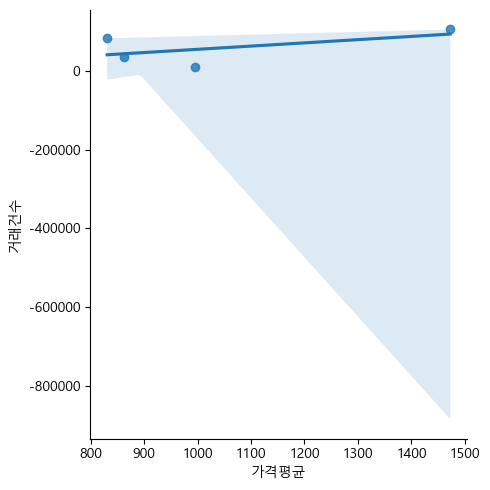

,가격평균,거래건수
건물용도,,
아파트,1472.399260,106094
단독다가구,994.576078,11094
오피스텔,863.335048,34856
연립다세대,831.053006,83627


건물용도
아파트      1472.399260
단독다가구     994.576078
오피스텔      863.335048
연립다세대     831.053006
Name: 가격평균, dtype: float64

건물용도
아파트      106094
연립다세대     83627
오피스텔      34856
단독다가구     11094
Name: 거래건수, dtype: int64

In [13]:
s1 = df.groupby("건물용도")["단위면적당가격"].mean().sort_values(ascending=False)
s2 = df.groupby("건물용도")["단위면적당가격"].count().sort_values(ascending=False)
s1.name = "가격평균"
s2.name = "거래건수"
df0 = pd.concat([s1, s2], axis=1)
for k, v in df0.items():
    print(k, v)
sns.lmplot(x='가격평균', y='거래건수', data=df0)
plt.show()
df0
s1
s2

### 구별 단위 면적당 가격 및 거래 건수

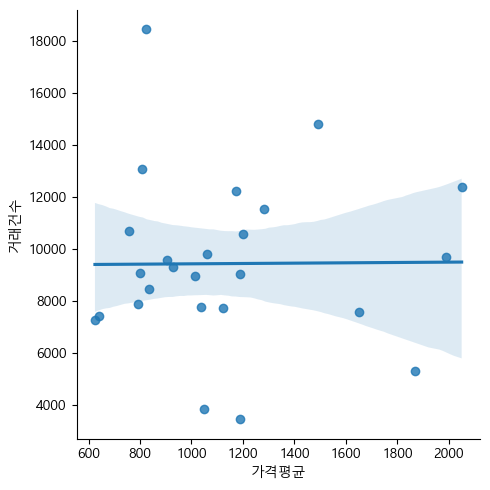

,가격평균,거래건수
자치구명,,
강남구,2049.491400,12372
서초구,1989.272070,9699
용산구,1870.107188,5286
성동구,1650.968213,7553
송파구,1491.540527,14803


자치구명
강남구     2049.491400
서초구     1989.272070
용산구     1870.107188
성동구     1650.968213
송파구     1491.540527
마포구     1280.766799
영등포구    1200.212447
중구      1187.888804
동작구     1187.297041
강동구     1173.741174
광진구     1121.519599
양천구     1058.806064
종로구     1050.283782
서대문구    1037.631380
동대문구    1012.809236
성북구      928.354922
노원구      905.446937
중랑구      834.819311
강서구      824.388576
은평구      809.415698
관악구      801.454595
금천구      792.540138
구로구      756.248243
강북구      639.855046
도봉구      624.974889
Name: 가격평균, dtype: float64

자치구명
강서구     18437
송파구     14803
은평구     13076
강남구     12372
강동구     12203
마포구     11511
구로구     10679
영등포구    10580
양천구      9785
서초구      9699
노원구      9581
성북구      9281
관악구      9077
동작구      9019
동대문구     8938
중랑구      8465
금천구      7872
서대문구     7775
광진구      7735
성동구      7553
강북구      7394
도봉구      7270
용산구      5286
종로구      3836
중구       3443
Name: 거래건수, dtype: int64

In [14]:
s1 = df.groupby("자치구명")["단위면적당가격"].mean().sort_values(ascending=False)
s2 = df.groupby("자치구명")["단위면적당가격"].count().sort_values(ascending=False)
s1.name = "가격평균"
s2.name = "거래건수"
df0 = pd.concat([s1, s2], axis=1)
#df0.plot(kind="barh", grid=True)
sns.lmplot(x='가격평균', y='거래건수', data=df0)
plt.show()
df0.head()
s1
s2

### 동별 단위 면적당 가격 및 거래 건수

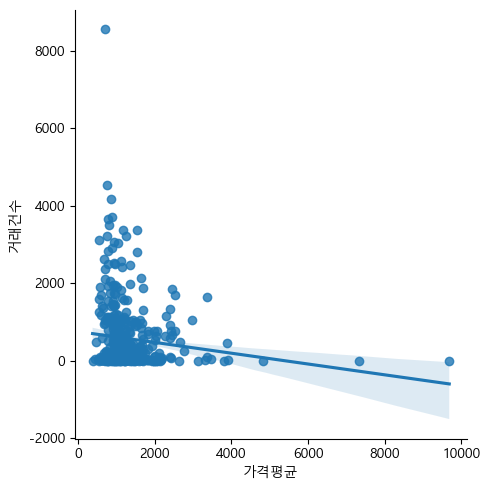

In [15]:
s1 = df.groupby("법정동명")["단위면적당가격"].mean().sort_values(ascending=False)
s2 = df.groupby("법정동명")["단위면적당가격"].count().sort_values(ascending=False)
# df[df["법정동명"] == "인사동"].head()
# df[df["법정동명"] == "봉원동"].head()
s1.name = "가격평균"
s2.name = "거래건수"
df0 = pd.concat([s1, s2], axis=1)
sns.lmplot(x='가격평균', y='거래건수', data=df0)
plt.show()
#df0

### 연도별건물용도별 단위건물면적(㎡)당 평균가격

Text(0.5, 1.0, '건물용도별 단위건물면적(㎡)당 평균가격 변화')

Text(0.5, 0, '년도')

Text(0, 0.5, '단위건물면적당 평균가격 (만원/㎡)')

(0.0, 1600.0)

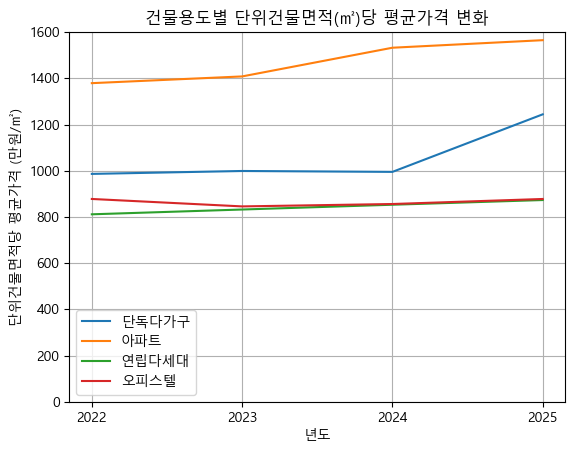

In [16]:
gby = df.groupby(["건물용도", "접수연도"])
gdf = pd.DataFrame(gby)

result_dict = {}
for i in range(len(gdf)):
    legend = gdf.iloc[i][0][0]
    year = str(gdf.iloc[i][0][1])
    if (legend not in result_dict):
        result_dict[legend] = {}
    result_dict[legend][year] = gdf.iloc[i][1]["단위면적당가격"].mean()
#result_dict

for kind, vdict in result_dict.items():
    plt.plot(vdict.keys(), vdict.values())
plt.title("건물용도별 단위건물면적(㎡)당 평균가격 변화")
plt.legend(result_dict.keys())
plt.xlabel("년도")
plt.ylabel("단위건물면적당 평균가격 (만원/㎡)")
plt.ylim(0, 1600)
plt.grid(True)
plt.show()

### 자치구별 & 건물용도별 단위건물면적(㎡)당 평균가격 변화 

,0,1
0,"(강남구, 2022, 단독다가구)",접수연도 자치구코드 자치구명 법정동코드 법정동명 지번구분 지번구...
1,"(강남구, 2022, 아파트)",접수연도 자치구코드 자치구명 법정동코드 법정동명 지번구분 지번구...
2,"(강남구, 2022, 연립다세대)",접수연도 자치구코드 자치구명 법정동코드 법정동명 지번구분 지번구...
3,"(강남구, 2022, 오피스텔)",접수연도 자치구코드 자치구명 법정동코드 법정동명 지번구분 지번구...
4,"(강남구, 2023, 단독다가구)",접수연도 자치구코드 자치구명 법정동코드 법정동명 지번구분 지번구...
...,...,...
394,"(중랑구, 2024, 오피스텔)",접수연도 자치구코드 자치구명 법정동코드 법정동명 지번구분 지번구분...
395,"(중랑구, 2025, 단독다가구)",접수연도 자치구코드 자치구명 법정동코드 법정동명 지번구분 지번구분명...
396,"(중랑구, 2025, 아파트)",접수연도 자치구코드 자치구명 법정동코드 법정동명 지번구분 지번구분명...
397,"(중랑구, 2025, 연립다세대)",접수연도 자치구코드 자치구명 법정동코드 법정동명 지번구분 지번구분명...


<Figure size 1000x1000 with 0 Axes>

Text(0.5, 1.0, '자치구별 단위건물면적(㎡)당 평균가격 변화 (연립다세대)')

Text(0.5, 0, '년도')

Text(0, 0.5, '단위건물면적당 평균가격 (만원/㎡)')

(0.0, 2043.6663687055072)

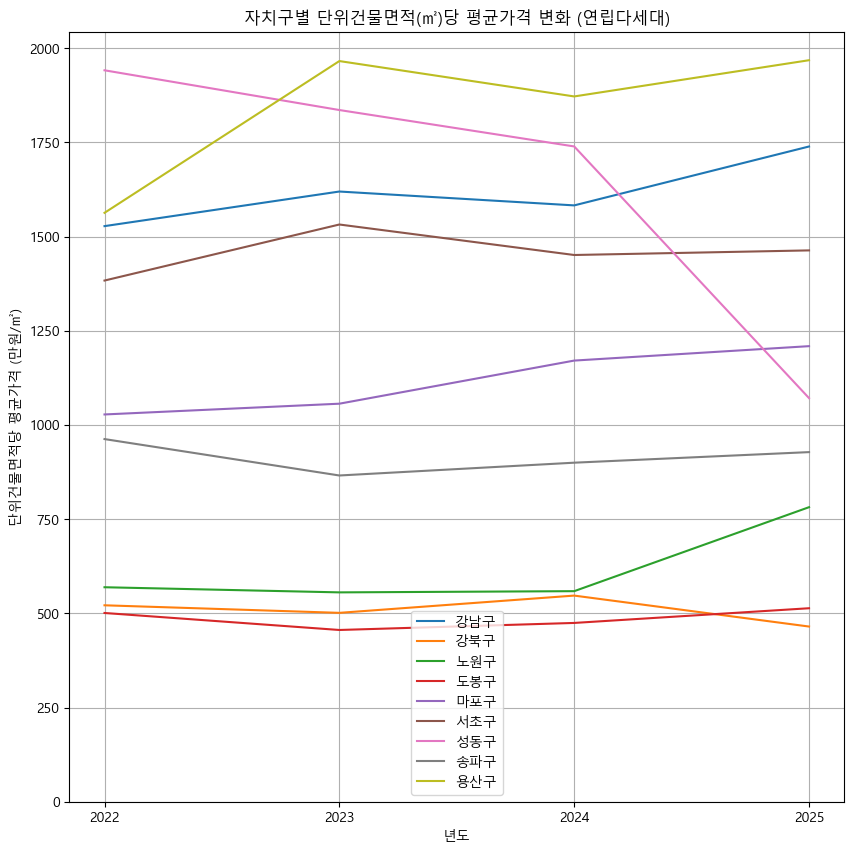

<Figure size 1000x1000 with 0 Axes>

Text(0.5, 1.0, '자치구별 단위건물면적(㎡)당 평균가격 변화 (단독다가구)')

Text(0.5, 0, '년도')

Text(0, 0.5, '단위건물면적당 평균가격 (만원/㎡)')

(0.0, 5711.957353974356)

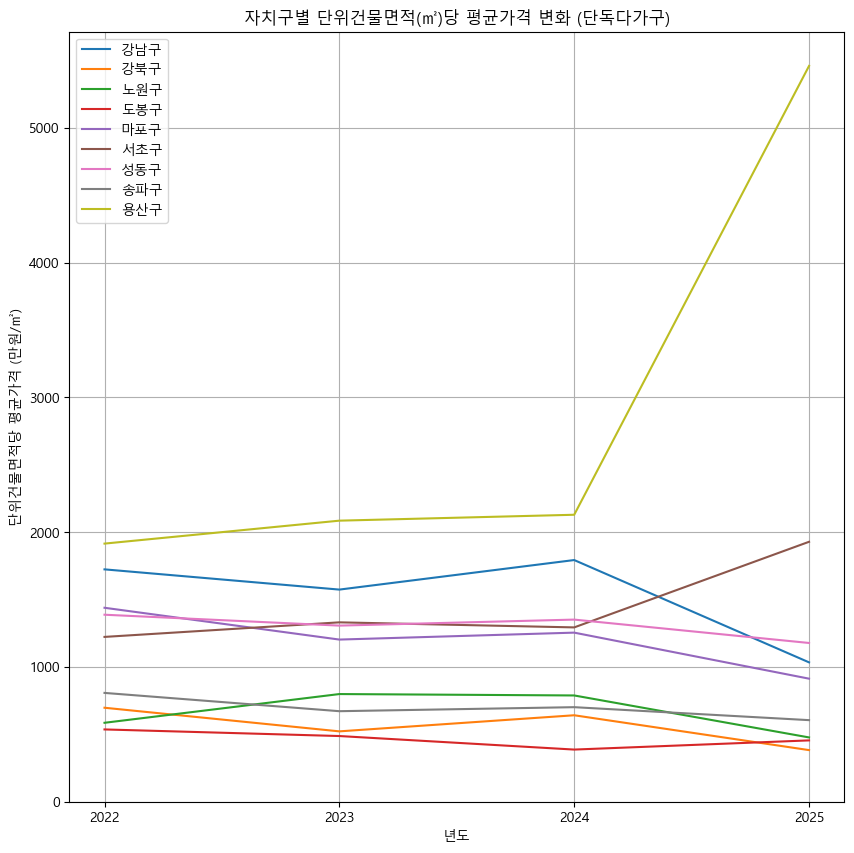

<Figure size 1000x1000 with 0 Axes>

Text(0.5, 1.0, '자치구별 단위건물면적(㎡)당 평균가격 변화 (오피스텔)')

Text(0.5, 0, '년도')

Text(0, 0.5, '단위건물면적당 평균가격 (만원/㎡)')

(0.0, 1198.0321653486142)

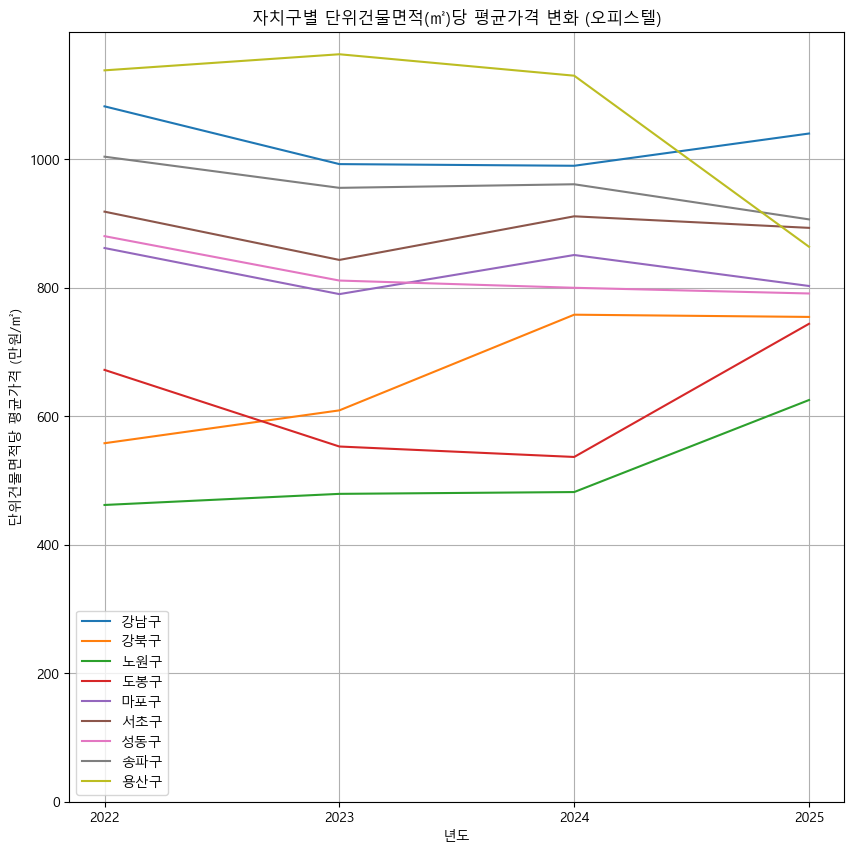

<Figure size 1000x1000 with 0 Axes>

Text(0.5, 1.0, '자치구별 단위건물면적(㎡)당 평균가격 변화 (아파트)')

Text(0.5, 0, '년도')

Text(0, 0.5, '단위건물면적당 평균가격 (만원/㎡)')

(0.0, 3156.603915580056)

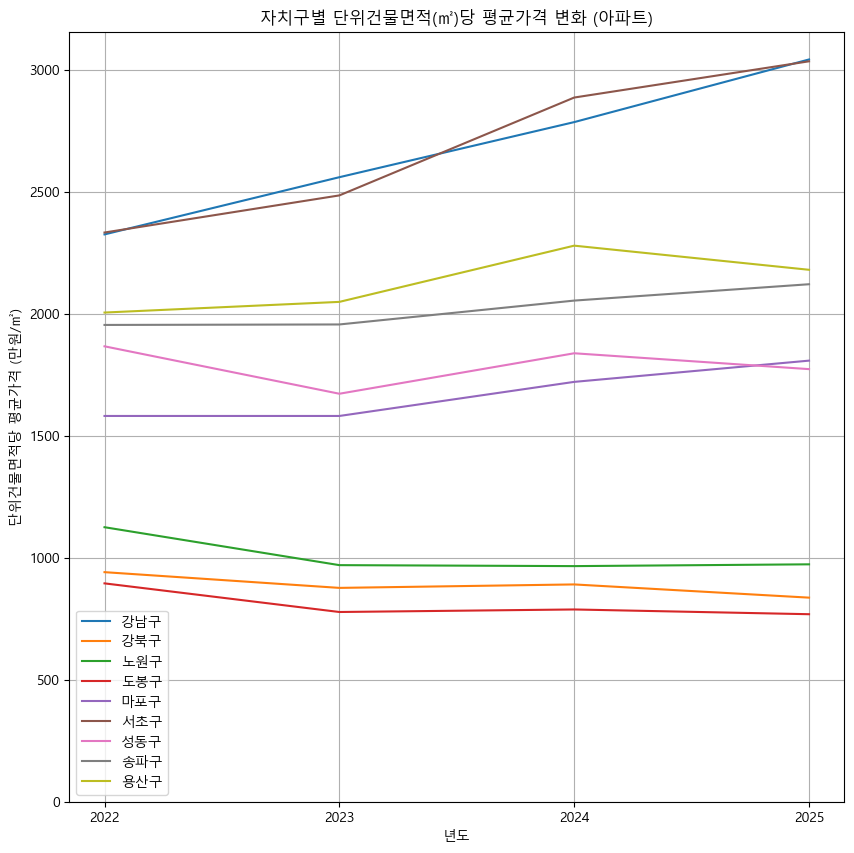

In [20]:
gby = df.groupby(["자치구명", "접수연도", "건물용도"])
gdf = pd.DataFrame(gby)
gdf

house_type_list = df["건물용도"].unique().tolist()
for h in range(len(house_type_list)):
    house_type = house_type_list[h]
    #
    result_dict = {}
    for i in range(len(gdf)):
        legend = gdf.iloc[i][0][0]
        year = str(gdf.iloc[i][0][1])
        if (gdf.iloc[i][0][2] != house_type):
            continue
        if (legend not in result_dict):
            result_dict[legend] = {}
        result_dict[legend][year] = gdf.iloc[i][1]["단위면적당가격"].mean()
    #
    legend_list = []
    # filter_list = ["강남구", "서초구", "송파구"] # 강남3구
    # filter_list = ["마포구", "용산구", "성동구"] # 마용성
    # filter_list = ["노원구", "도봉구", "강북구"] # 노도강
    filter_list = ["강남구", "서초구", "송파구", "마포구", "용산구", "성동구", "노원구", "도봉구", "강북구"]
    #
    plt.figure(figsize=(10, 10))
    for legend, vdict in result_dict.items():
        if (legend in filter_list):
            plt.plot(vdict.keys(), vdict.values())
            legend_list.append(legend)
    plt.title("자치구별 단위건물면적(㎡)당 평균가격 변화 (%s)" % house_type)
    plt.legend(legend_list)
    plt.xlabel("년도")
    plt.ylabel("단위건물면적당 평균가격 (만원/㎡)")
    plt.ylim(bottom=0)
    plt.grid(True)
    plt.show()

In [19]:
s = (df["건물용도"] == "단독다가구") & (df["자치구명"] == "용산구") & (df["단위면적당가격"] > 3000)
s.value_counts()
df[s]

False    235542
True        129
Name: count, dtype: int64

,접수연도,자치구코드,자치구명,법정동코드,법정동명,지번구분,지번구분명,본번,부번,건물명,...,건물면적(㎡),토지면적(㎡),층,권리구분,취소일,건축년도,건물용도,신고구분,신고한 개업공인중개사 시군구명,단위면적당가격
2545,2025,11170,용산구,12200,문배동,NaN,NaN,NaN,NaN,NaN,...,42.97,36.0,NaN,NaN,NaN,1949.0,단독다가구,직거래,NaN,9085.408424
2947,2025,11170,용산구,13400,주성동,NaN,NaN,NaN,NaN,NaN,...,47.27,109.0,NaN,NaN,NaN,1967.0,단독다가구,중개거래,서울 용산구,6769.621324
3196,2025,11170,용산구,12200,문배동,NaN,NaN,NaN,NaN,NaN,...,42.97,36.0,NaN,NaN,20241219.0,1949.0,단독다가구,직거래,NaN,9085.408424
9490,2024,11170,용산구,13300,서빙고동,NaN,NaN,NaN,NaN,NaN,...,117.29,169.0,NaN,NaN,NaN,1957.0,단독다가구,중개거래,"서울 서초구, 서울 용산구",3751.385455
10521,2024,11170,용산구,10100,후암동,NaN,NaN,NaN,NaN,NaN,...,21.19,46.0,NaN,NaN,NaN,1959.0,단독다가구,중개거래,서울 용산구,3067.484663
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
231366,2022,11170,용산구,13100,한남동,NaN,NaN,NaN,NaN,NaN,...,1742.90,1433.0,NaN,NaN,NaN,1970.0,단독다가구,직거래,NaN,6361.684549
231703,2022,11170,용산구,11900,효창동,NaN,NaN,NaN,NaN,NaN,...,23.14,116.7,NaN,NaN,NaN,1947.0,단독다가구,중개거래,서울 동작구,3241.140882
234067,2022,11170,용산구,10800,서계동,NaN,NaN,NaN,NaN,NaN,...,42.98,89.2,NaN,NaN,NaN,1934.0,단독다가구,중개거래,서울 용산구,3001.395998
234663,2022,11170,용산구,13100,한남동,NaN,NaN,NaN,NaN,NaN,...,321.40,594.4,NaN,NaN,NaN,1971.0,단독다가구,중개거래,서울 용산구,3733.665215


# END